<a href="https://colab.research.google.com/github/mariaulia/2025_VISI-KOMPUTER/blob/main/JOBSHEET_3_TEKNIK_REGRESI_GAMBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 03:TEKNIK REGRESI GAMBAR

##Praktikum D1 – Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

###1) Setup & Generator Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1) # radius acak
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r) # center-x
    cy = np.random.randint(r, img_size - r) # center-y
    cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
    img = (img / 255.0).astype(np.float32)
    # 3-channel biar kompatibel CNN
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

###2) “Tebak Apa?” — Tampilkan Contoh Gambar TANPA Label

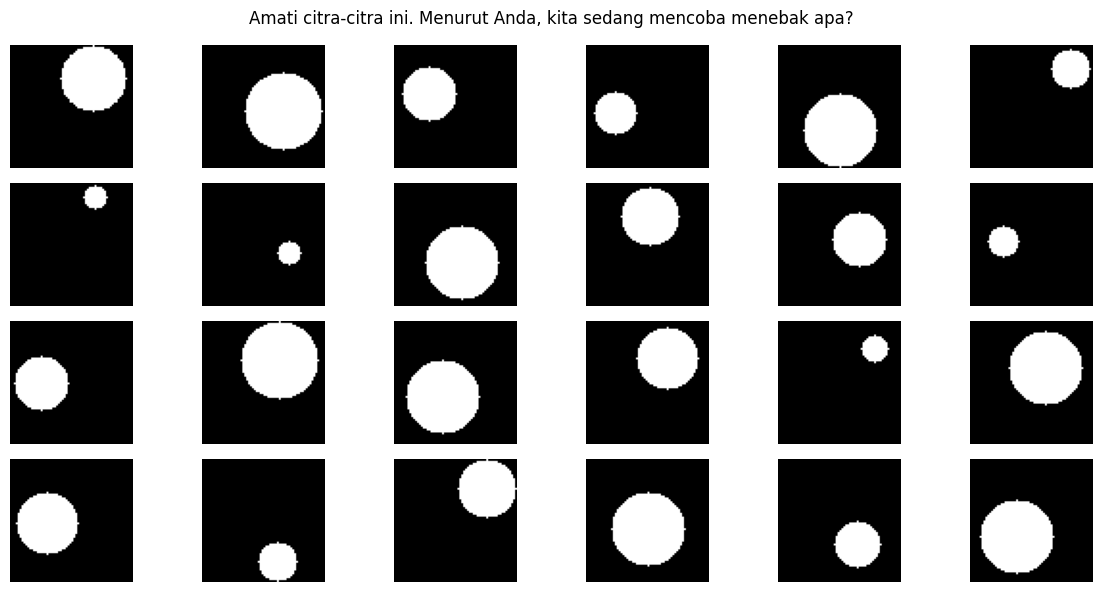

In [ ]:
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]

cols = 6
rows = N_show // cols

plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()


###3) Buka Jawaban — Target yang Ingin Diprediksi

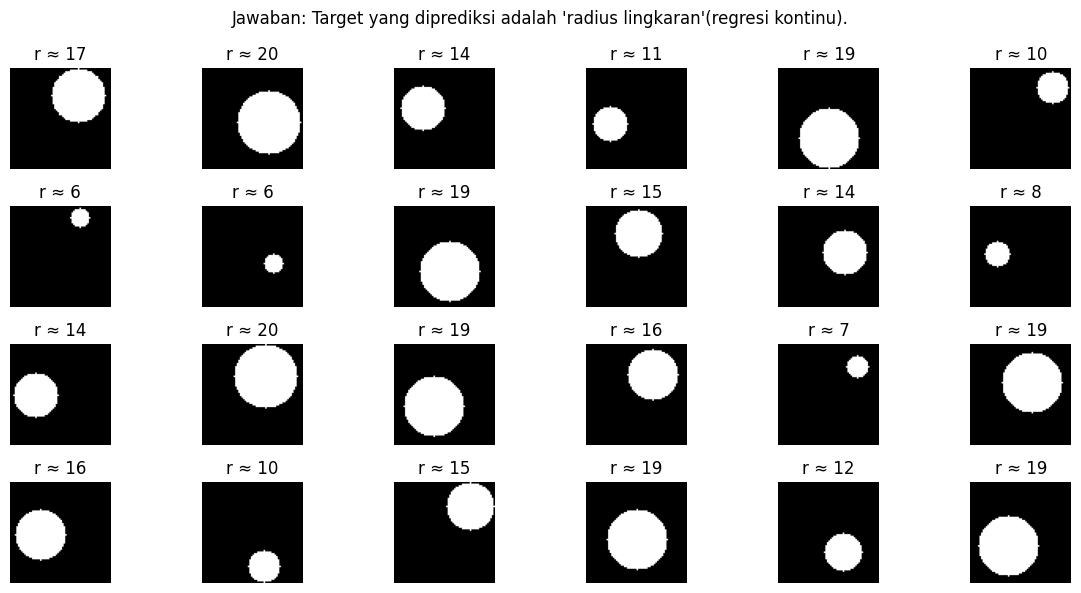

In [ ]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran'(regresi kontinu).")
plt.tight_layout()
plt.show()

###4) (Opsional) Latih CNN Kecil untuk Memprediksi Radius

In [ ]:
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=1)

y_pred = model.predict(Xte).ravel()

mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)

print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 101.9248 - mae: 8.4949 - val_loss: 6.7409 - val_mae: 1.9311
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5251 - mae: 1.4257 - val_loss: 1.6123 - val_mae: 1.0220
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5764 - mae: 1.0252 - val_loss: 1.5715 - val_mae: 1.0056
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6445 - mae: 1.0555 - val_loss: 1.5385 - val_mae: 0.9967
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4758 - mae: 0.9917 - val_loss: 1.5125 - val_mae: 0.9962
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5039 - mae: 0.9978 - val_loss: 1.4960 - val_mae: 0.9795
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4321 - mae: 0.9714 - val_loss: 1.4736 - val_mae: 0.9757
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4518 - mae: 0.9814 - val_loss: 1.4567 - val_mae: 0.9723
Epoch 9/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4

###Plot Loss & Prediksi

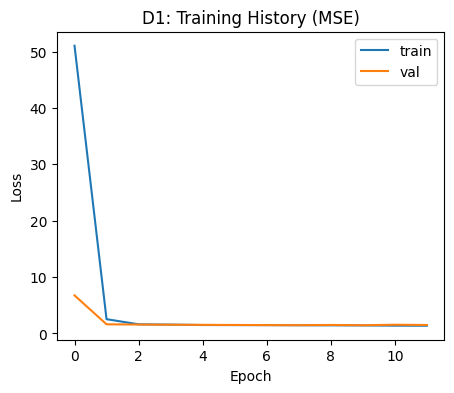

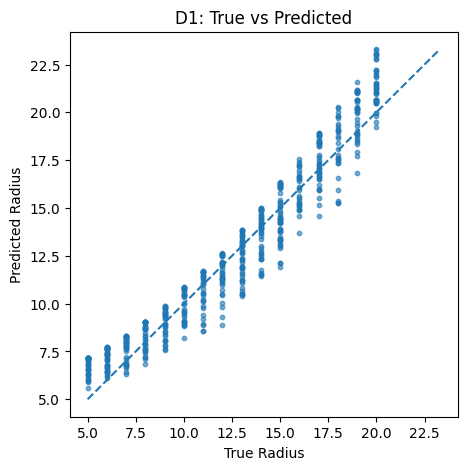

In [ ]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()


In [ ]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Split data
# Modify y_train and y_val to only include the radius
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Langkah 4 & 5: Bangun model CNN multi-output ===
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # Output is now a single value (radius)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 75.8824 - mae: 6.6681 - val_loss: 1.9651 - val_mae: 1.0650
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6886 - mae: 1.0295 - val_loss: 1.5460 - val_mae: 1.0060
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5510 - mae: 1.0170 - val_loss: 1.5108 - val_mae: 0.9943
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4371 - mae: 0.9744 - val_loss: 1.5212 - val_mae: 0.9802
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5024 - mae: 1.0050 - val_loss: 1.5057 - val_mae: 1.0068
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4985 - mae: 0.9878 - val_loss: 1.5743 - val_mae: 1.0435
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4908 - mae: 1.0037 - val_loss: 1.4856 - val_mae: 1.0035
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3906 - mae: 0.9584 - val_loss: 1.8803 - val_mae: 1.0640
Epoch 9/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4302 - mae

###Tantangan Mini

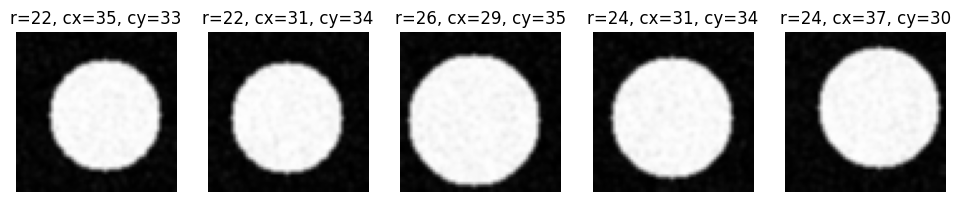

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Langkah 1: Buat dataset sintetik (modifikasi tantangan mini) ===
def generate_circle_image(size=64, r_min=8, r_max=28, add_noise=True):
    """Generate citra lingkaran dengan noise opsional"""
    img = np.zeros((size, size), dtype=np.uint8)
    r = np.random.randint(r_min, r_max)
    cx, cy = np.random.randint(r, size - r, size=2)
    cv2.circle(img, (cx, cy), r, 255, -1)

    if add_noise:
        # Tambahkan Gaussian noise
        noise = np.random.normal(0, 15, (size, size))
        img = np.clip(img + noise, 0, 255).astype(np.uint8)
        # Tambahkan blur ringan
        img = cv2.GaussianBlur(img, (3, 3), 0)

    return img, np.array([r, cx, cy])

# Buat dataset
N = 3000
X = []
y = []
for _ in range(N):
    img, target = generate_circle_image()
    X.append(img)
    y.append(target)

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = np.array(y)

# Visualisasi contoh
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(X[i].squeeze(), cmap='gray')
    axes[i].set_title(f"r={y[i,0]}, cx={y[i,1]}, cy={y[i,2]}")
    axes[i].axis('off')
plt.show()


In [ ]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Langkah 4 & 5: Bangun model CNN multi-output ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='linear')  # <=== output [r, cx, cy]
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 452.5871 - mae: 17.2322 - val_loss: 66.7155 - val_mae: 6.4688
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 88.9045 - mae: 7.3209 - val_loss: 55.3668 - val_mae: 5.6084
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 77.6932 - mae: 6.6038 - val_loss: 49.7165 - val_mae: 4.9317
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 68.3618 - mae: 6.1762 - val_loss: 46.2192 - val_mae: 4.6566
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 66.7362 - mae: 6.1126 - val_loss: 43.2296 - val_mae: 4.4236
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 60.0934 - mae: 5.7315 - val_loss: 44.6875 - val_mae: 5.0446
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 58.6855 - mae: 5.6900 - val_loss: 34.4593 - val_mae: 4.1272
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 49.9609 - mae: 5.2629 - val_loss: 26.0957 - val_mae: 3.4852
Epoch 9/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 46.259

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
📊 Radius (r)
MAE  = 1.299
RMSE = 1.602
R²   = 0.920

📊 Center X (cx)
MAE  = 2.615
RMSE = 3.487
R²   = 0.850

📊 Center Y (cy)
MAE  = 2.949
RMSE = 4.006
R²   = 0.801



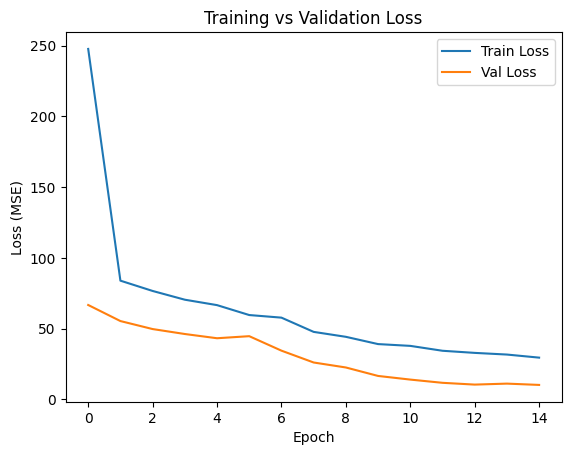

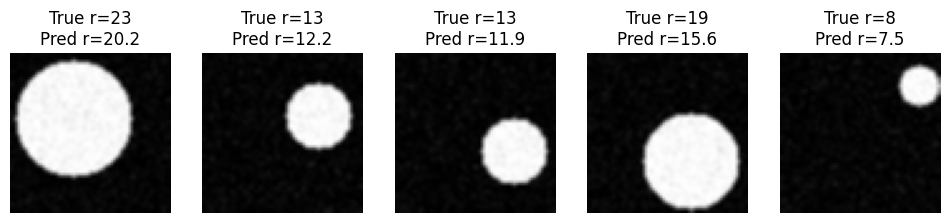

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_val)

# Hitung metrik per variabel
for i, name in enumerate(["Radius (r)", "Center X (cx)", "Center Y (cy)"]):
    mae = mean_absolute_error(y_val[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_val[:, i], y_pred[:, i]))
    r2 = r2_score(y_val[:, i], y_pred[:, i])
    print(f"📊 {name}")
    print(f"MAE  = {mae:.3f}")
    print(f"RMSE = {rmse:.3f}")
    print(f"R²   = {r2:.3f}\n")

# Visualisasi hasil belajar
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Visualisasi prediksi contoh
n_show = 5
fig, axes = plt.subplots(1, n_show, figsize=(12, 3))
for i in range(n_show):
    axes[i].imshow(X_val[i].squeeze(), cmap='gray')
    axes[i].set_title(f"True r={y_val[i,0]:.0f}\nPred r={y_pred[i,0]:.1f}")
    axes[i].axis('off')
plt.show()


##Praktikum D2 – Menebak Umur Manusia dari Foto Wajah (UTKFace)

###Mengunggah kaggle.json ke Colab

In [ ]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariaaulia","key":"4317ac2f855c4c1bfda59e7b47e4eaff"}'}

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


###Mengunduh Dataset UTKFace dari Kaggle

In [ ]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


###Menampilkan Contoh Gambar Dataset

Total gambar ditemukan: 23708


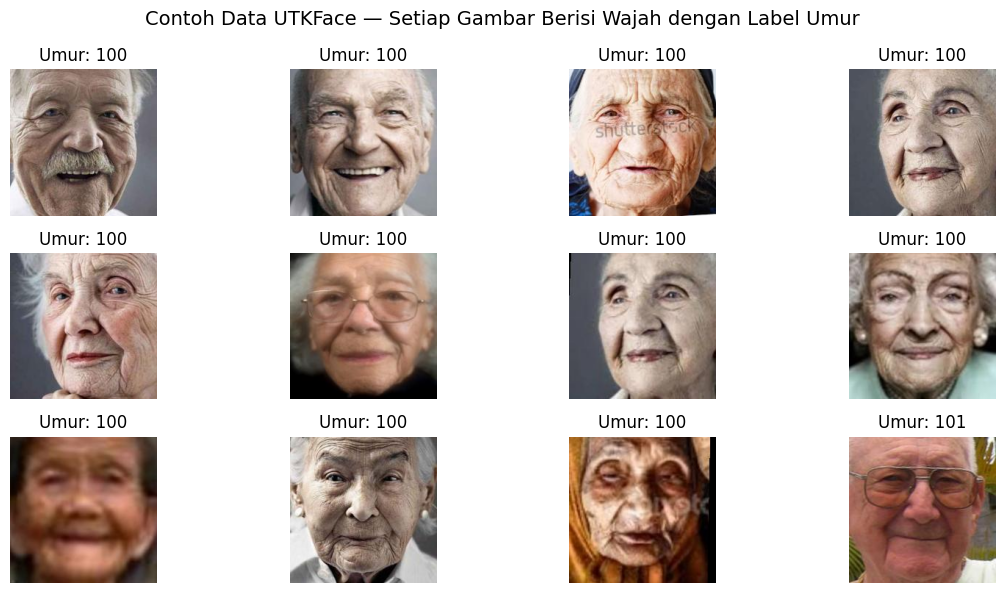

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

###Siapkan Dataset untuk Model

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
  return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
  img = tf.io.read_file(fp)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")


✅ Dataset siap dilatih.


###Membangun Model dengan Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")
# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
  include_top=False,
  input_shape=(IMG_SIZE, IMG_SIZE, 3),
  weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone
# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)
# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
        loss='mse', metrics=['mae'])
model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

###Melatih Model (Tahap 1 – Frozen)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 58s 135ms/step - loss: 325.0038 - mae: 13.2584 - val_loss: 157.0717 - val_mae: 9.4949 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - loss: 153.8586 - mae: 9.2064 - val_loss: 144.2477 - val_mae: 8.9741 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 145.1608 - mae: 8.8548 - val_loss: 140.1327 - val_mae: 8.8012 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 140.0707 - mae: 8.6949 - val_loss: 138.1310 - val_mae: 8.6848 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 138.6018 - mae: 8.6158 - val_loss: 136.5386 - val_mae: 8.6082 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 136.5947 - mae: 8.5420 - val_loss: 136.5192 - val_mae: 8.6733 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 135.8176 - mae: 8.5036 - val_loss: 133.5385 - va

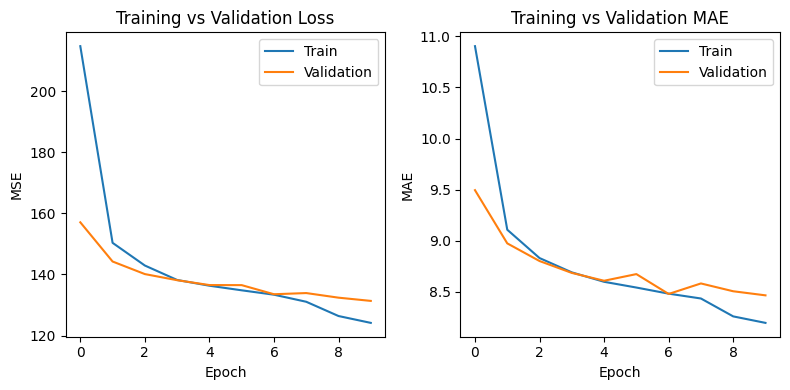

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True,
        monitor='val_loss'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        patience=2,
        factor=0.5,
        min_lr=1e-5,
        monitor='val_loss'
    )
]

# Melatih model dengan callback
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan
plt.figure(figsize=(8, 4))

# Plot Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

###Fine-tuning Backbone (Tahap 2)

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - loss: 186.3034 - mae: 10.1080 - val_loss: 145.4495 - val_mae: 9.1906 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - loss: 79.2210 - mae: 6.6118 - val_loss: 131.5356 - val_mae: 8.7501 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - loss: 53.4290 - mae: 5.4959 - val_loss: 111.7420 - val_mae: 7.9467 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - loss: 38.6835 - mae: 4.7112 - val_loss: 105.8423 - val_mae: 7.4015 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 29.6090 - mae: 4.1609 - val_loss: 106.5781 - val_mae: 7.4499 - learning_rate: 1.0000e-04


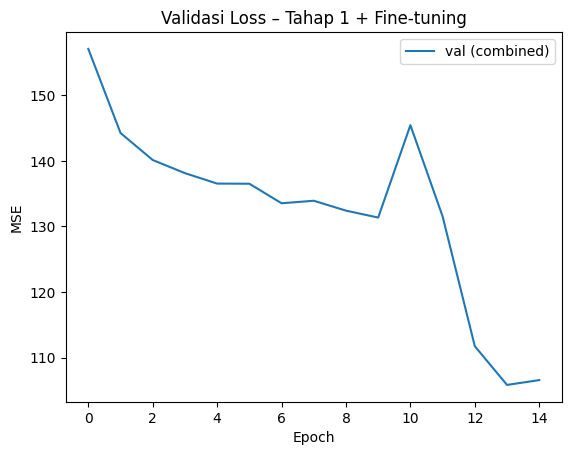

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer
# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
loss='mse', metrics=['mae'])
history_ft = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=5,
  callbacks=cb,
  verbose=1
)
# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'],
label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

###Evaluasi Akhir (MAE, RMSE, R2)

MAE = 7.40 tahun
RMSE = 10.29 tahun
R2 = 0.733


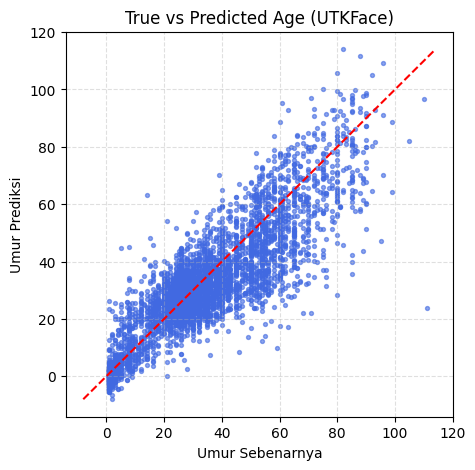

In [ ]:
from math import sqrt
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for
batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)
print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R2 = {r2:.3f}")
# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

###Melihat Contoh Prediksi Nyata

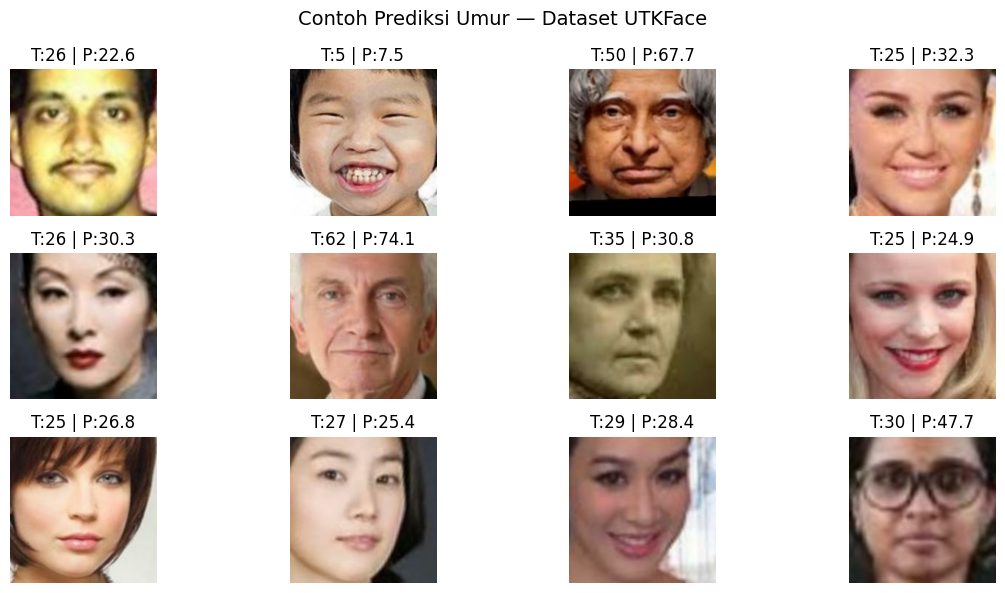

In [ ]:
import random
sample_paths = random.sample(test_files, 12)
plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img.numpy())
  plt.title(f"T:{true_age} | P:{pred_age:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

##Praktikum D3 — Menilai “Kepopuleran Hewan Peliharaan” dari Foto

In [ ]:
from google.colab import files
import os, shutil

files.upload()

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    !pip -q install kaggle
    print("Kaggle API siap digunakan.")
else:
    print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle (1).json
Kaggle API siap digunakan.


###Mengunduh dan Mengekstrak Dataset

In [ ]:
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("Dataset Pawpularity berhasil diekstrak.")

Dataset Pawpularity berhasil diekstrak.


###Melihat Contoh Data


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

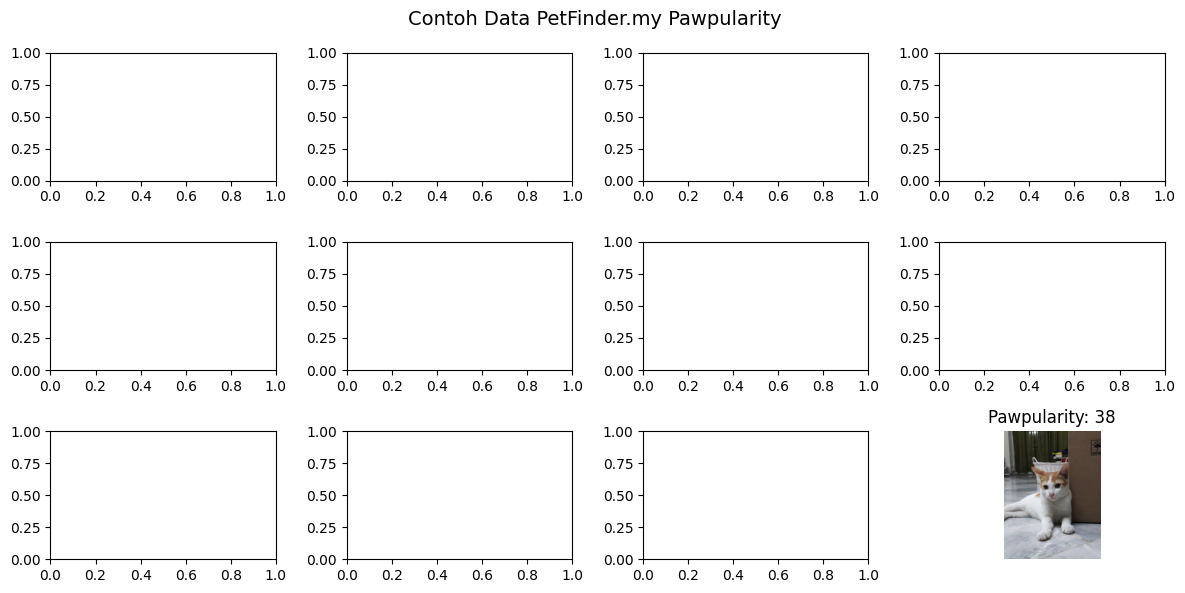

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())
# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
  img = Image.open(row.path)
  plt.subplot(3, 4, i + 1)
plt.imshow(img)
plt.title(f"Pawpularity: {row.Pawpularity}")
plt.axis('off')
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

###Persiapan Dataset

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)
train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],
train_df['Pawpularity']))\
.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
.shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'],
val_df['Pawpularity']))\
.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
.batch(64).prefetch(tf.data.AUTOTUNE)
print(f"Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

Dataset siap digunakan — 7929 untuk training, 1983 untuk validasi.


###Membangun Model (EfficientNetB0)

In [ ]:
from tensorflow.keras import layers, models
base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False # freeze sementara
inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_2 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

###Melatih Model

In [ ]:
from tensorflow.keras import layers, models

# Model definition moved here
base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False # freeze sementara

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

cb = [
tf.keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True),
tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]
history = model.fit(train_ds, validation_data=val_ds, epochs=10,
callbacks=cb, verbose=1)

# Save the trained model
model.save('pawpularity_model.h5')
print("✅ Model saved successfully!")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_3 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 105s 506ms/step - loss: 814.8339 - mae: 21.4148 - val_loss: 475.9901 - val_mae: 16.0810 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 90s 245ms/step - loss: 419.9340 - mae: 15.1565 - val_loss: 428.0402 - val_mae: 15.5111 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - loss: 385.5595 - mae: 14.6231 - val_loss: 402.5973 - val_mae: 14.5643 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 228ms/step - loss: 377.4599 - mae: 14.4315 - val_loss: 388.8476 - val_mae: 14.4442 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - loss: 364.3079 - mae: 14.2121 - val_loss: 377.1734 - val_mae: 14.3356 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - loss: 356.5266 - mae: 13.9923 - val_loss: 373.9279 - val_mae: 14.3910 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - loss: 339.0864 - mae: 13.7629 - val_

✅ Model saved successfully!


###Melihat Proses Belajar

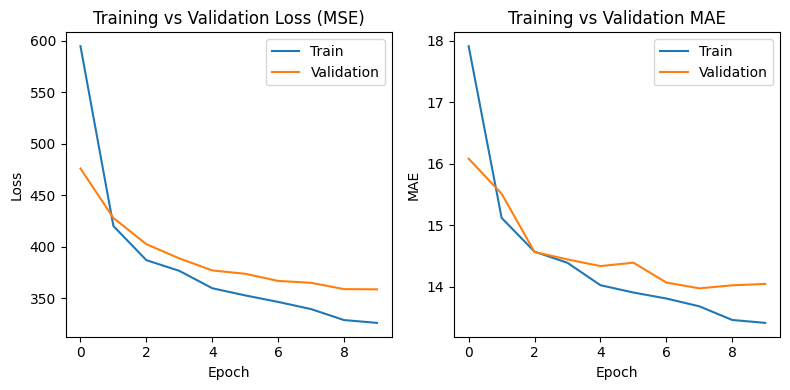

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

###Evaluasi Model

MAE = 14.05
RMSE = 18.94
R2 = 0.188


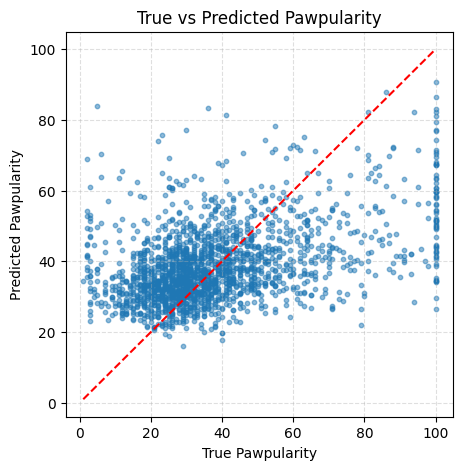

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for
batch in val_ds])
mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R2 = {r2:.3f}")
# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

###Melihat Contoh Prediksi

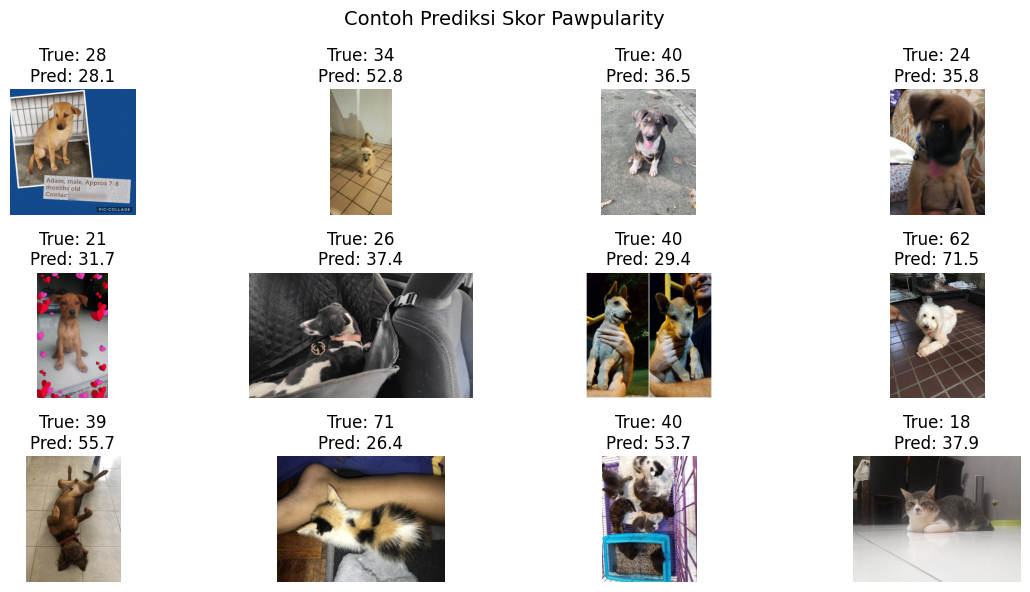

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_rows.itertuples()):
    img = Image.open(row.path)
    pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
    plt.axis('off')

plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

###Tugas Mini

###Penugasan

####A. PREDIKSI USIA

In [ ]:
!mkdir ~/.kaggle
from google.colab import files
files.upload()   # ← Upload file kaggle.json kamu di sini


mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariaaulia","key":"4317ac2f855c4c1bfda59e7b47e4eaff"}'}

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jangedoo/utkface-new


Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip utkface-new.zip -d /content/UTKFace


Streaming output truncated to the last 5000 lines.
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: /content/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  in

In [ ]:
# --- 2. LOAD DATASET UTKFACE (dibatasi agar tidak crash) ---
import os
import cv2
import numpy as np

DATASET_PATH = "/content/UTKFace"

images = []
ages = []
MAX_IMAGES = 3000  # batas maksimal biar tidak kehabisan RAM
count = 0

for root, dirs, files in os.walk(DATASET_PATH):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            try:
                age = int(filename.split("_")[0])
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (64, 64))
                images.append(img)
                ages.append(age)
                count += 1
                if count >= MAX_IMAGES:
                    break
            except:
                pass
    if count >= MAX_IMAGES:
        break

print("Jumlah data berhasil dimuat:", len(images))

Jumlah data berhasil dimuat: 3000


In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(images) / 255.0
y = np.array(ages)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data train:", X_train.shape, "Data test:", X_test.shape)

Data train: (2400, 64, 64, 3) Data test: (600, 64, 64, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output regresi usia
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=5
)

# --- 7. EVALUASI MODEL ---
loss, mae = model.evaluate(X_test, y_test)
print(f"\nMean Absolute Error (MAE) pada data uji: {mae:.2f} tahun")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - loss: 25.6990 - mae: 25.6990 - val_loss: 42.9520 - val_mae: 42.9520
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 21.2127 - mae: 21.2127 - val_loss: 26.9248 - val_mae: 26.9248
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 21.0515 - mae: 21.0515 - val_loss: 27.0283 - val_mae: 27.0283
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 21.0419 - mae: 21.0419 - val_loss: 24.1612 - val_mae: 24.1612
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 21.4781 - mae: 21.4781 - val_loss: 24.7750 - val_mae: 24.7750
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.4415 - mae: 25.4415

Mean Absolute Error (MAE) pada data uji: 24.77 tahun


In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"\nMean Absolute Error (MAE) pada data uji: {mae:.2f} tahun")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.4415 - mae: 25.4415

Mean Absolute Error (MAE) pada data uji: 24.77 tahun


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

📸 Prediksi usia kamu adalah sekitar: 1.9 tahun


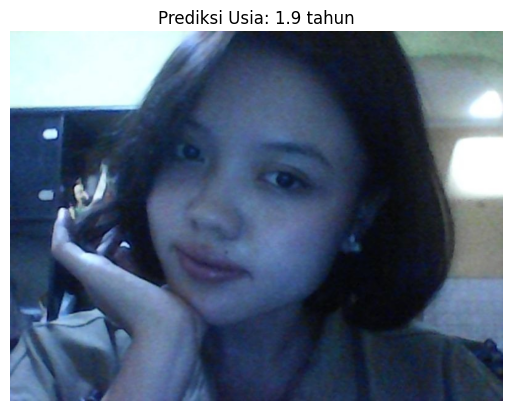

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

foto_path = "/content/foto1.jpeg"  # pastikan file kamu sudah diupload

img = cv2.imread(foto_path)
if img is None:
    print("⚠️ Foto tidak ditemukan. Pastikan nama dan path benar.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (64, 64)) / 255.0
    pred = model.predict(np.expand_dims(img_resized, axis=0))[0][0]
    print(f"\n📸 Prediksi usia kamu adalah sekitar: {pred:.1f} tahun")

    plt.imshow(img_rgb)
    plt.title(f"Prediksi Usia: {pred:.1f} tahun")
    plt.axis('off')
    plt.show()